In [1]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle as shf
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

import imgaug as ia
from imgaug import augmenters as iaa

### Import files

In [2]:
def load_data(folder, max_elements=None):
    path = os.path.join("input", folder)
    if not os.path.exists(path):
        print(f"Error: Folder '{folder}' does not exist.")
        return None

    files = os.listdir(path)
    if len(files) == 0:
        print(f"Error: No files found in folder '{folder}'.")
        return None

    if max_elements is not None:
        files = files[:max_elements]

    data = []
    num_processed = 0
    num_total = len(files)
    for file in files:
        if file != '.DS_Store':
            img_path = os.path.join(path, file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))
            img = img.astype('float32') / 255.0

            data.append(img)

            num_processed += 1
            print(f"Processed image {num_processed}/{num_total}")
    return np.array(data)

In [3]:
def load_all_data():
    train_normal = load_data('train/NORMAL')
    train_pneumonia = load_data('train/PNEUMONIA')

    test_normal = load_data('test/NORMAL')
    test_pneumonia = load_data('test/PNEUMONIA')

    val_normal = load_data('val/NORMAL')
    val_pneumonia = load_data('val/PNEUMONIA')

    normal_images = np.concatenate((train_normal, test_normal, val_normal), axis=0)
    pneumonia_images = np.concatenate((train_pneumonia, test_pneumonia, val_pneumonia), axis=0)

    all_images = np.concatenate((normal_images, pneumonia_images), axis=0)
    all_labels = np.concatenate((np.zeros(len(normal_images)), np.ones(len(pneumonia_images))), axis=0)
    
    return normal_images, pneumonia_images, all_images, all_labels

In [4]:
normal_images, pneumonia_images, all_images, all_labels = load_all_data()

Processed image 1/1342
Processed image 2/1342
Processed image 3/1342
Processed image 4/1342
Processed image 5/1342
Processed image 6/1342
Processed image 7/1342
Processed image 8/1342
Processed image 9/1342
Processed image 10/1342
Processed image 11/1342
Processed image 12/1342
Processed image 13/1342
Processed image 14/1342
Processed image 15/1342
Processed image 16/1342
Processed image 17/1342
Processed image 18/1342
Processed image 19/1342
Processed image 20/1342
Processed image 21/1342
Processed image 22/1342
Processed image 23/1342
Processed image 24/1342
Processed image 25/1342
Processed image 26/1342
Processed image 27/1342
Processed image 28/1342
Processed image 29/1342
Processed image 30/1342
Processed image 31/1342
Processed image 32/1342
Processed image 33/1342
Processed image 34/1342
Processed image 35/1342
Processed image 36/1342
Processed image 37/1342
Processed image 38/1342
Processed image 39/1342
Processed image 40/1342
Processed image 41/1342
Processed image 42/1342
P

Processed image 336/1342
Processed image 337/1342
Processed image 338/1342
Processed image 339/1342
Processed image 340/1342
Processed image 341/1342
Processed image 342/1342
Processed image 343/1342
Processed image 344/1342
Processed image 345/1342
Processed image 346/1342
Processed image 347/1342
Processed image 348/1342
Processed image 349/1342
Processed image 350/1342
Processed image 351/1342
Processed image 352/1342
Processed image 353/1342
Processed image 354/1342
Processed image 355/1342
Processed image 356/1342
Processed image 357/1342
Processed image 358/1342
Processed image 359/1342
Processed image 360/1342
Processed image 361/1342
Processed image 362/1342
Processed image 363/1342
Processed image 364/1342
Processed image 365/1342
Processed image 366/1342
Processed image 367/1342
Processed image 368/1342
Processed image 369/1342
Processed image 370/1342
Processed image 371/1342
Processed image 372/1342
Processed image 373/1342
Processed image 374/1342
Processed image 375/1342


Processed image 665/1342
Processed image 666/1342
Processed image 667/1342
Processed image 668/1342
Processed image 669/1342
Processed image 670/1342
Processed image 671/1342
Processed image 672/1342
Processed image 673/1342
Processed image 674/1342
Processed image 675/1342
Processed image 676/1342
Processed image 677/1342
Processed image 678/1342
Processed image 679/1342
Processed image 680/1342
Processed image 681/1342
Processed image 682/1342
Processed image 683/1342
Processed image 684/1342
Processed image 685/1342
Processed image 686/1342
Processed image 687/1342
Processed image 688/1342
Processed image 689/1342
Processed image 690/1342
Processed image 691/1342
Processed image 692/1342
Processed image 693/1342
Processed image 694/1342
Processed image 695/1342
Processed image 696/1342
Processed image 697/1342
Processed image 698/1342
Processed image 699/1342
Processed image 700/1342
Processed image 701/1342
Processed image 702/1342
Processed image 703/1342
Processed image 704/1342


Processed image 1000/1342
Processed image 1001/1342
Processed image 1002/1342
Processed image 1003/1342
Processed image 1004/1342
Processed image 1005/1342
Processed image 1006/1342
Processed image 1007/1342
Processed image 1008/1342
Processed image 1009/1342
Processed image 1010/1342
Processed image 1011/1342
Processed image 1012/1342
Processed image 1013/1342
Processed image 1014/1342
Processed image 1015/1342
Processed image 1016/1342
Processed image 1017/1342
Processed image 1018/1342
Processed image 1019/1342
Processed image 1020/1342
Processed image 1021/1342
Processed image 1022/1342
Processed image 1023/1342
Processed image 1024/1342
Processed image 1025/1342
Processed image 1026/1342
Processed image 1027/1342
Processed image 1028/1342
Processed image 1029/1342
Processed image 1030/1342
Processed image 1031/1342
Processed image 1032/1342
Processed image 1033/1342
Processed image 1034/1342
Processed image 1035/1342
Processed image 1036/1342
Processed image 1037/1342
Processed im

Processed image 1320/1342
Processed image 1321/1342
Processed image 1322/1342
Processed image 1323/1342
Processed image 1324/1342
Processed image 1325/1342
Processed image 1326/1342
Processed image 1327/1342
Processed image 1328/1342
Processed image 1329/1342
Processed image 1330/1342
Processed image 1331/1342
Processed image 1332/1342
Processed image 1333/1342
Processed image 1334/1342
Processed image 1335/1342
Processed image 1336/1342
Processed image 1337/1342
Processed image 1338/1342
Processed image 1339/1342
Processed image 1340/1342
Processed image 1341/1342
Processed image 1/3876
Processed image 2/3876
Processed image 3/3876
Processed image 4/3876
Processed image 5/3876
Processed image 6/3876
Processed image 7/3876
Processed image 8/3876
Processed image 9/3876
Processed image 10/3876
Processed image 11/3876
Processed image 12/3876
Processed image 13/3876
Processed image 14/3876
Processed image 15/3876
Processed image 16/3876
Processed image 17/3876
Processed image 18/3876
Proce

Processed image 325/3876
Processed image 326/3876
Processed image 327/3876
Processed image 328/3876
Processed image 329/3876
Processed image 330/3876
Processed image 331/3876
Processed image 332/3876
Processed image 333/3876
Processed image 334/3876
Processed image 335/3876
Processed image 336/3876
Processed image 337/3876
Processed image 338/3876
Processed image 339/3876
Processed image 340/3876
Processed image 341/3876
Processed image 342/3876
Processed image 343/3876
Processed image 344/3876
Processed image 345/3876
Processed image 346/3876
Processed image 347/3876
Processed image 348/3876
Processed image 349/3876
Processed image 350/3876
Processed image 351/3876
Processed image 352/3876
Processed image 353/3876
Processed image 354/3876
Processed image 355/3876
Processed image 356/3876
Processed image 357/3876
Processed image 358/3876
Processed image 359/3876
Processed image 360/3876
Processed image 361/3876
Processed image 362/3876
Processed image 363/3876
Processed image 364/3876


Processed image 661/3876
Processed image 662/3876
Processed image 663/3876
Processed image 664/3876
Processed image 665/3876
Processed image 666/3876
Processed image 667/3876
Processed image 668/3876
Processed image 669/3876
Processed image 670/3876
Processed image 671/3876
Processed image 672/3876
Processed image 673/3876
Processed image 674/3876
Processed image 675/3876
Processed image 676/3876
Processed image 677/3876
Processed image 678/3876
Processed image 679/3876
Processed image 680/3876
Processed image 681/3876
Processed image 682/3876
Processed image 683/3876
Processed image 684/3876
Processed image 685/3876
Processed image 686/3876
Processed image 687/3876
Processed image 688/3876
Processed image 689/3876
Processed image 690/3876
Processed image 691/3876
Processed image 692/3876
Processed image 693/3876
Processed image 694/3876
Processed image 695/3876
Processed image 696/3876
Processed image 697/3876
Processed image 698/3876
Processed image 699/3876
Processed image 700/3876


Processed image 993/3876
Processed image 994/3876
Processed image 995/3876
Processed image 996/3876
Processed image 997/3876
Processed image 998/3876
Processed image 999/3876
Processed image 1000/3876
Processed image 1001/3876
Processed image 1002/3876
Processed image 1003/3876
Processed image 1004/3876
Processed image 1005/3876
Processed image 1006/3876
Processed image 1007/3876
Processed image 1008/3876
Processed image 1009/3876
Processed image 1010/3876
Processed image 1011/3876
Processed image 1012/3876
Processed image 1013/3876
Processed image 1014/3876
Processed image 1015/3876
Processed image 1016/3876
Processed image 1017/3876
Processed image 1018/3876
Processed image 1019/3876
Processed image 1020/3876
Processed image 1021/3876
Processed image 1022/3876
Processed image 1023/3876
Processed image 1024/3876
Processed image 1025/3876
Processed image 1026/3876
Processed image 1027/3876
Processed image 1028/3876
Processed image 1029/3876
Processed image 1030/3876
Processed image 103

Processed image 1315/3876
Processed image 1316/3876
Processed image 1317/3876
Processed image 1318/3876
Processed image 1319/3876
Processed image 1320/3876
Processed image 1321/3876
Processed image 1322/3876
Processed image 1323/3876
Processed image 1324/3876
Processed image 1325/3876
Processed image 1326/3876
Processed image 1327/3876
Processed image 1328/3876
Processed image 1329/3876
Processed image 1330/3876
Processed image 1331/3876
Processed image 1332/3876
Processed image 1333/3876
Processed image 1334/3876
Processed image 1335/3876
Processed image 1336/3876
Processed image 1337/3876
Processed image 1338/3876
Processed image 1339/3876
Processed image 1340/3876
Processed image 1341/3876
Processed image 1342/3876
Processed image 1343/3876
Processed image 1344/3876
Processed image 1345/3876
Processed image 1346/3876
Processed image 1347/3876
Processed image 1348/3876
Processed image 1349/3876
Processed image 1350/3876
Processed image 1351/3876
Processed image 1352/3876
Processed im

Processed image 1636/3876
Processed image 1637/3876
Processed image 1638/3876
Processed image 1639/3876
Processed image 1640/3876
Processed image 1641/3876
Processed image 1642/3876
Processed image 1643/3876
Processed image 1644/3876
Processed image 1645/3876
Processed image 1646/3876
Processed image 1647/3876
Processed image 1648/3876
Processed image 1649/3876
Processed image 1650/3876
Processed image 1651/3876
Processed image 1652/3876
Processed image 1653/3876
Processed image 1654/3876
Processed image 1655/3876
Processed image 1656/3876
Processed image 1657/3876
Processed image 1658/3876
Processed image 1659/3876
Processed image 1660/3876
Processed image 1661/3876
Processed image 1662/3876
Processed image 1663/3876
Processed image 1664/3876
Processed image 1665/3876
Processed image 1666/3876
Processed image 1667/3876
Processed image 1668/3876
Processed image 1669/3876
Processed image 1670/3876
Processed image 1671/3876
Processed image 1672/3876
Processed image 1673/3876
Processed im

Processed image 1952/3876
Processed image 1953/3876
Processed image 1954/3876
Processed image 1955/3876
Processed image 1956/3876
Processed image 1957/3876
Processed image 1958/3876
Processed image 1959/3876
Processed image 1960/3876
Processed image 1961/3876
Processed image 1962/3876
Processed image 1963/3876
Processed image 1964/3876
Processed image 1965/3876
Processed image 1966/3876
Processed image 1967/3876
Processed image 1968/3876
Processed image 1969/3876
Processed image 1970/3876
Processed image 1971/3876
Processed image 1972/3876
Processed image 1973/3876
Processed image 1974/3876
Processed image 1975/3876
Processed image 1976/3876
Processed image 1977/3876
Processed image 1978/3876
Processed image 1979/3876
Processed image 1980/3876
Processed image 1981/3876
Processed image 1982/3876
Processed image 1983/3876
Processed image 1984/3876
Processed image 1985/3876
Processed image 1986/3876
Processed image 1987/3876
Processed image 1988/3876
Processed image 1989/3876
Processed im

Processed image 2279/3876
Processed image 2280/3876
Processed image 2281/3876
Processed image 2282/3876
Processed image 2283/3876
Processed image 2284/3876
Processed image 2285/3876
Processed image 2286/3876
Processed image 2287/3876
Processed image 2288/3876
Processed image 2289/3876
Processed image 2290/3876
Processed image 2291/3876
Processed image 2292/3876
Processed image 2293/3876
Processed image 2294/3876
Processed image 2295/3876
Processed image 2296/3876
Processed image 2297/3876
Processed image 2298/3876
Processed image 2299/3876
Processed image 2300/3876
Processed image 2301/3876
Processed image 2302/3876
Processed image 2303/3876
Processed image 2304/3876
Processed image 2305/3876
Processed image 2306/3876
Processed image 2307/3876
Processed image 2308/3876
Processed image 2309/3876
Processed image 2310/3876
Processed image 2311/3876
Processed image 2312/3876
Processed image 2313/3876
Processed image 2314/3876
Processed image 2315/3876
Processed image 2316/3876
Processed im

Processed image 2599/3876
Processed image 2600/3876
Processed image 2601/3876
Processed image 2602/3876
Processed image 2603/3876
Processed image 2604/3876
Processed image 2605/3876
Processed image 2606/3876
Processed image 2607/3876
Processed image 2608/3876
Processed image 2609/3876
Processed image 2610/3876
Processed image 2611/3876
Processed image 2612/3876
Processed image 2613/3876
Processed image 2614/3876
Processed image 2615/3876
Processed image 2616/3876
Processed image 2617/3876
Processed image 2618/3876
Processed image 2619/3876
Processed image 2620/3876
Processed image 2621/3876
Processed image 2622/3876
Processed image 2623/3876
Processed image 2624/3876
Processed image 2625/3876
Processed image 2626/3876
Processed image 2627/3876
Processed image 2628/3876
Processed image 2629/3876
Processed image 2630/3876
Processed image 2631/3876
Processed image 2632/3876
Processed image 2633/3876
Processed image 2634/3876
Processed image 2635/3876
Processed image 2636/3876
Processed im

Processed image 2915/3876
Processed image 2916/3876
Processed image 2917/3876
Processed image 2918/3876
Processed image 2919/3876
Processed image 2920/3876
Processed image 2921/3876
Processed image 2922/3876
Processed image 2923/3876
Processed image 2924/3876
Processed image 2925/3876
Processed image 2926/3876
Processed image 2927/3876
Processed image 2928/3876
Processed image 2929/3876
Processed image 2930/3876
Processed image 2931/3876
Processed image 2932/3876
Processed image 2933/3876
Processed image 2934/3876
Processed image 2935/3876
Processed image 2936/3876
Processed image 2937/3876
Processed image 2938/3876
Processed image 2939/3876
Processed image 2940/3876
Processed image 2941/3876
Processed image 2942/3876
Processed image 2943/3876
Processed image 2944/3876
Processed image 2945/3876
Processed image 2946/3876
Processed image 2947/3876
Processed image 2948/3876
Processed image 2949/3876
Processed image 2950/3876
Processed image 2951/3876
Processed image 2952/3876
Processed im

Processed image 3234/3876
Processed image 3235/3876
Processed image 3236/3876
Processed image 3237/3876
Processed image 3238/3876
Processed image 3239/3876
Processed image 3240/3876
Processed image 3241/3876
Processed image 3242/3876
Processed image 3243/3876
Processed image 3244/3876
Processed image 3245/3876
Processed image 3246/3876
Processed image 3247/3876
Processed image 3248/3876
Processed image 3249/3876
Processed image 3250/3876
Processed image 3251/3876
Processed image 3252/3876
Processed image 3253/3876
Processed image 3254/3876
Processed image 3255/3876
Processed image 3256/3876
Processed image 3257/3876
Processed image 3258/3876
Processed image 3259/3876
Processed image 3260/3876
Processed image 3261/3876
Processed image 3262/3876
Processed image 3263/3876
Processed image 3264/3876
Processed image 3265/3876
Processed image 3266/3876
Processed image 3267/3876
Processed image 3268/3876
Processed image 3269/3876
Processed image 3270/3876
Processed image 3271/3876
Processed im

Processed image 3550/3876
Processed image 3551/3876
Processed image 3552/3876
Processed image 3553/3876
Processed image 3554/3876
Processed image 3555/3876
Processed image 3556/3876
Processed image 3557/3876
Processed image 3558/3876
Processed image 3559/3876
Processed image 3560/3876
Processed image 3561/3876
Processed image 3562/3876
Processed image 3563/3876
Processed image 3564/3876
Processed image 3565/3876
Processed image 3566/3876
Processed image 3567/3876
Processed image 3568/3876
Processed image 3569/3876
Processed image 3570/3876
Processed image 3571/3876
Processed image 3572/3876
Processed image 3573/3876
Processed image 3574/3876
Processed image 3575/3876
Processed image 3576/3876
Processed image 3577/3876
Processed image 3578/3876
Processed image 3579/3876
Processed image 3580/3876
Processed image 3581/3876
Processed image 3582/3876
Processed image 3583/3876
Processed image 3584/3876
Processed image 3585/3876
Processed image 3586/3876
Processed image 3587/3876
Processed im

Processed image 3874/3876
Processed image 3875/3876
Processed image 1/234
Processed image 2/234
Processed image 3/234
Processed image 4/234
Processed image 5/234
Processed image 6/234
Processed image 7/234
Processed image 8/234
Processed image 9/234
Processed image 10/234
Processed image 11/234
Processed image 12/234
Processed image 13/234
Processed image 14/234
Processed image 15/234
Processed image 16/234
Processed image 17/234
Processed image 18/234
Processed image 19/234
Processed image 20/234
Processed image 21/234
Processed image 22/234
Processed image 23/234
Processed image 24/234
Processed image 25/234
Processed image 26/234
Processed image 27/234
Processed image 28/234
Processed image 29/234
Processed image 30/234
Processed image 31/234
Processed image 32/234
Processed image 33/234
Processed image 34/234
Processed image 35/234
Processed image 36/234
Processed image 37/234
Processed image 38/234
Processed image 39/234
Processed image 40/234
Processed image 41/234
Processed imag

Processed image 127/390
Processed image 128/390
Processed image 129/390
Processed image 130/390
Processed image 131/390
Processed image 132/390
Processed image 133/390
Processed image 134/390
Processed image 135/390
Processed image 136/390
Processed image 137/390
Processed image 138/390
Processed image 139/390
Processed image 140/390
Processed image 141/390
Processed image 142/390
Processed image 143/390
Processed image 144/390
Processed image 145/390
Processed image 146/390
Processed image 147/390
Processed image 148/390
Processed image 149/390
Processed image 150/390
Processed image 151/390
Processed image 152/390
Processed image 153/390
Processed image 154/390
Processed image 155/390
Processed image 156/390
Processed image 157/390
Processed image 158/390
Processed image 159/390
Processed image 160/390
Processed image 161/390
Processed image 162/390
Processed image 163/390
Processed image 164/390
Processed image 165/390
Processed image 166/390
Processed image 167/390
Processed image 

### Visualisation

In [5]:
def visualize_data(normal_data, pneumonia_data):
    if normal_data is None or pneumonia_data is None:
        print("Error: Data is not loaded correctly.")
        return

    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
    labels = ['Normal', 'Pneumonia']

    for i, data in enumerate([normal_data, pneumonia_data]):
        if data is not None:
            for j, img in enumerate(data[:4]):
                axes[i, j].imshow(img, cmap='gray')
                axes[i, j].axis('off')
                axes[i, j].set_title(labels[i])

    plt.tight_layout()
    plt.axis('off')
    plt.show()

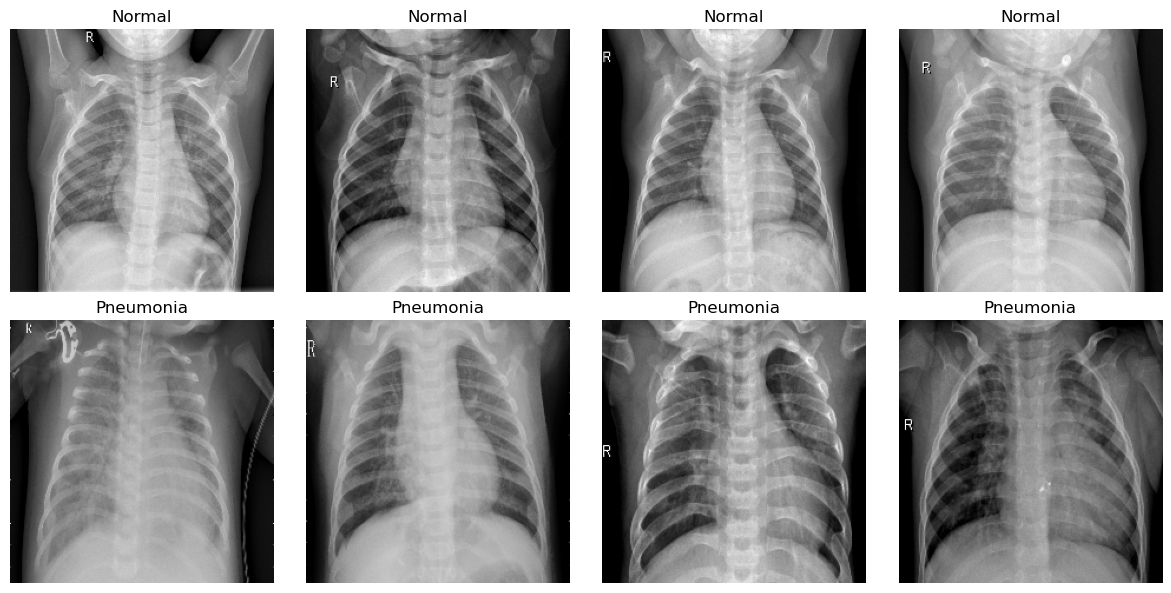

In [6]:
visualize_data(normal_images, pneumonia_images)

In [7]:
def visualize_data_distribution(train_normal, train_pneumonia):
    if train_normal is None or train_pneumonia is None:
        print("Error: Data is not loaded correctly.")
        return

    num_normal = len(train_normal)
    num_pneumonia = len(train_pneumonia)

    labels = ['Normal', 'Pneumonia']

    counts = [num_normal, num_pneumonia]

    plt.bar(labels, counts)
    plt.xlabel('Labels')
    plt.ylabel('Number of samples')
    plt.title(f'Visualize the distribution')
    
    for i in range(len(labels)):
        plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')
    plt.show()

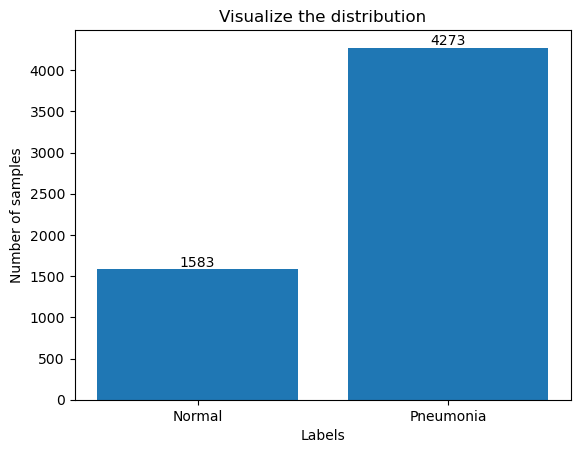

In [8]:
# Visualize distribution data
visualize_data_distribution(normal_images, pneumonia_images)

### Datas

In [9]:
def split_data(images, labels, test_size, val_size):
    train_images, test_val_images, train_labels, test_val_labels = train_test_split(images, labels, test_size=(test_size + val_size), random_state=42)

    test_images, val_images, test_labels, val_labels = train_test_split(test_val_images, test_val_labels, test_size=val_size/(test_size + val_size), random_state=42)

    return train_images, train_labels, val_images, val_labels, test_images, test_labels 

In [10]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(all_images, all_labels, test_size=0.2, val_size=0.2)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(3513, 224, 224, 3)
(3513,)
(1172, 224, 224, 3)
(1172,)
(1171, 224, 224, 3)
(1171,)


### Correct the imbalance

In [12]:
initial_bias = np.log([len(pneumonia_images)/len(normal_images)])
initial_bias

array([0.99299438])

In [13]:
poids_0 = (1 / len(normal_images))*len(X_train)/2.0
poids_1 = (1 / len(pneumonia_images))*len(X_train)/2.0

In [14]:
class_weight = {0: poids_0, 1: poids_1}

In [15]:
print('Weight for class 0: {:.2f}'.format(poids_0))
print('Weight for class 1: {:.2f}'.format(poids_1))

Weight for class 0: 1.11
Weight for class 1: 0.41


# Model

In [16]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [17]:
k_values = [i for i in range(1, 100)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X_train_flat[:1000])

for k in k_values:
    print(k, '/100')
    rfc = RandomForestClassifier(n_estimators=k, class_weight=class_weight)
    score = cross_val_score(rfc, X, y_train[:1000], cv=5)
    scores.append(np.mean(score))

1 /100
2 /100
3 /100
4 /100
5 /100
6 /100
7 /100
8 /100
9 /100
10 /100
11 /100
12 /100
13 /100
14 /100
15 /100
16 /100
17 /100
18 /100
19 /100
20 /100
21 /100
22 /100
23 /100
24 /100
25 /100
26 /100
27 /100
28 /100
29 /100
30 /100
31 /100
32 /100
33 /100
34 /100
35 /100
36 /100
37 /100
38 /100
39 /100
40 /100
41 /100
42 /100
43 /100
44 /100
45 /100
46 /100
47 /100
48 /100
49 /100
50 /100
51 /100
52 /100
53 /100
54 /100
55 /100
56 /100
57 /100
58 /100
59 /100
60 /100
61 /100
62 /100
63 /100
64 /100
65 /100
66 /100
67 /100
68 /100
69 /100
70 /100
71 /100
72 /100
73 /100
74 /100
75 /100
76 /100
77 /100
78 /100
79 /100
80 /100
81 /100
82 /100
83 /100
84 /100
85 /100
86 /100
87 /100
88 /100
89 /100
90 /100
91 /100
92 /100
93 /100
94 /100
95 /100
96 /100
97 /100
98 /100
99 /100


Text(0, 0.5, 'Accuracy Score')

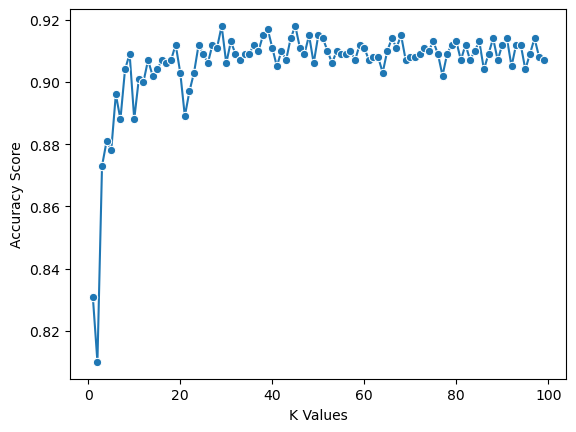

In [18]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [19]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

In [20]:
print(best_k)

29


In [21]:
rfc = RandomForestClassifier(n_estimators=best_k, class_weight=class_weight)

In [22]:
rfc.fit(X_train_flat, y_train)

RandomForestClassifier(class_weight={0: 1.1096020214782059,
                                     1: 0.41106950620173177},
                       n_estimators=29)

### Evaluate the model

In [23]:
predict_out = rfc.predict(X_test_flat)

In [24]:
accuracy = accuracy_score(y_test, predict_out)
precision = precision_score(y_test, predict_out)
recall = recall_score(y_test, predict_out)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9171648163962425
Precision: 0.9137343927355278
Recall: 0.9745762711864406


In [25]:
classification = classification_report(y_test, predict_out, target_names=['Normal','Pneumonia'])
print(classification)

              precision    recall  f1-score   support

      Normal       0.93      0.78      0.85       345
   Pneumonia       0.91      0.97      0.94       826

    accuracy                           0.92      1171
   macro avg       0.92      0.88      0.90      1171
weighted avg       0.92      0.92      0.91      1171



In [26]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predict_out)

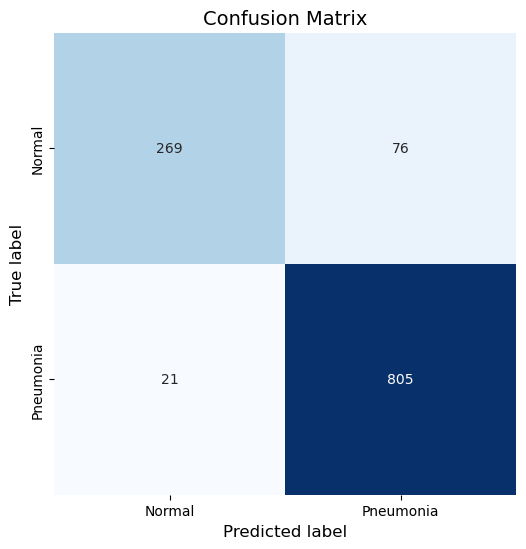

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=['Normal','Pneumonia'], yticklabels=['Normal','Pneumonia'])
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()